In [1]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [2]:
from catalog_query import get_VVV_catalog
import cutout_manager as cm
import vvv_plots as vvv

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table


import regions
from regions import Regions
import importlib as imp

imp.reload(vvv)

<module 'vvv_plots' from '/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/vvv_plots.py'>

In [3]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [4]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [5]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))


In [6]:
cutout_405 = cm.get_cutout_405(position_HMSFR, 8*u.arcmin, 3*u.arcmin)#, basepath='~/research/Research/JWST/')

In [7]:
cat_VVV = get_VVV_catalog(position_HMSFR, w=3*u.arcmin, l=8*u.arcmin)
#get_VVV_catalog(pos_ctr, w=2*u.arcmin, l=2*u.arcmin)
print(len(cat_VVV))

/red/adamginsburg/repos/astroquery/astroquery/vizier/core.py:827: UserWarning: VOTABLE parsing raised exception: None:394:1169: ValueError: invalid literal for int() with base 10: '-' (in row 20, col 'Var')
  warnings.warn("VOTABLE parsing raised exception: {0}".format(ex))


9023


In [8]:
catalog_VVV = vvv.VVVCatalog(cat_VVV)

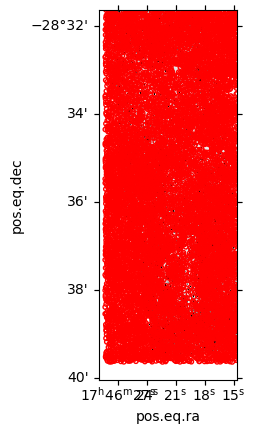

In [26]:
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(catalog_VVV.ra, catalog_VVV.dec, transform=ax.get_transform('world'), s=10, facecolor='none', edgecolor='red')

why


<Axes: xlabel='H - KS', ylabel='KS'>

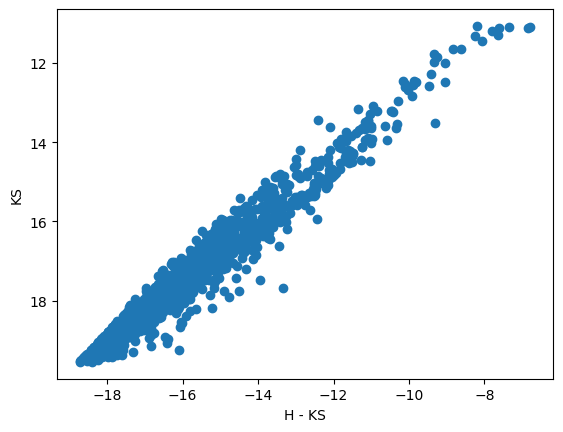

In [12]:
#color = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#mag = cat_VVV['Ks1ap1']
#
#plt.figure()
#plt.scatter(color, mag)
#
#plt.gca().invert_yaxis()
#plt.xlabel('H-Ks')
#plt.ylabel('Ks')

catalog_VVV.plot_CMD('H', 'Ks', 'Ks')

why
why


/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: xlabel='J - H', ylabel='H'>

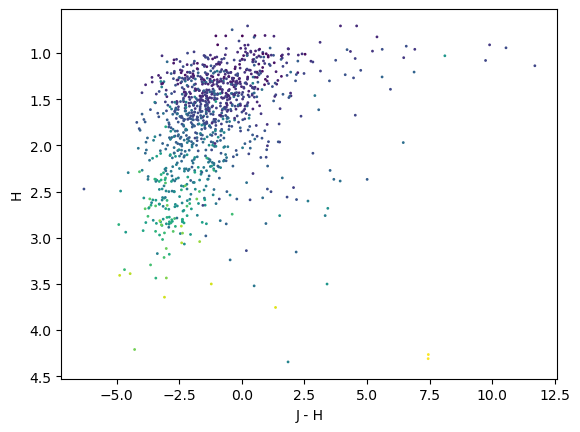

In [24]:
#color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#mag = cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#im = plt.scatter(color, mag, c=color2, cmap='viridis')
#
#plt.gca().invert_yaxis()
#plt.ylabel('H')
#plt.xlabel('J-H')
#plt.colorbar(im, label='H-Ks')

catalog_VVV.plot_CMD('J', 'H', 'H', c=catalog_VVV.color('H', 'Ks'), s=1)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


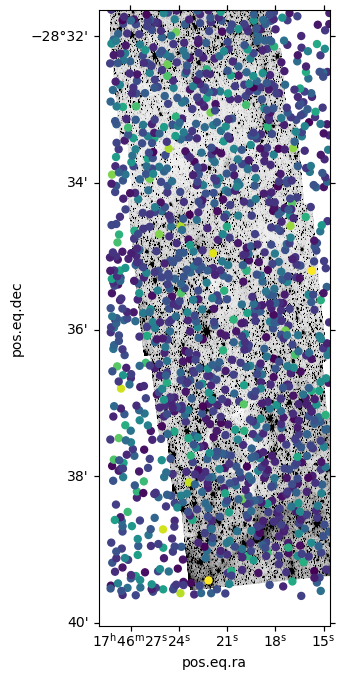

In [25]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=25, facecolor='none', c=color2, cmap='viridis')

why
why
why


<Axes: xlabel='J - H', ylabel='H - KS'>

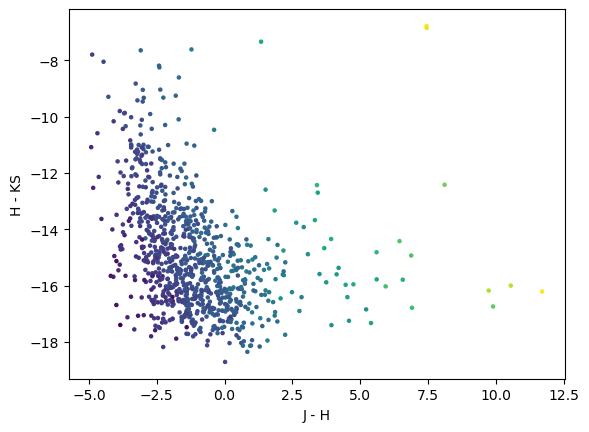

In [33]:
#color1 = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#plt.scatter(color, mag)
#
#plt.gca().invert_yaxis()
#plt.xlabel('J-H')
#plt.ylabel('H')

catalog_VVV.plot_CCD('J', 'H', 'H', 'Ks', s=5, c=catalog_VVV.color('J', 'Z'), cmap='viridis')